# Preparando tudo

In [ ]:
#carregando as biblotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sympy as sp

In [ ]:
#carregando os dados
comercio = pd.read_csv('online_retail_small.csv',
                    encoding = 'latin1',
                    sep = ';',
                    decimal = ',')

comercio

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,562602,23345,DOLLY GIRL BEAKER,12,08/08/2011 10:11,1.25,12865,Austria
1,563100,23345,DOLLY GIRL BEAKER,12,12/08/2011 09:57,1.25,12381,Norway
2,574442,23472,NINE DRAWER OFFICE TIDY,2,04/11/2011 11:40,14.95,12704,Finland
3,573200,22167,OVAL WALL MIRROR DIAMANTE,2,28/10/2011 11:43,9.95,12432,Norway
4,546780,23007,SPACEBOY BABY GIFT SET,24,17/03/2011 07:40,14.95,12435,Denmark
...,...,...,...,...,...,...,...,...
3210,573108,23144,ZINC T-LIGHT HOLDER STARS SMALL,12,27/10/2011 15:09,0.83,12430,Norway
3211,557472,84832,ZINC WILLIE WINKIE CANDLE STICK,12,20/06/2011 13:27,0.85,12432,Norway
3212,557621,84832,ZINC WILLIE WINKIE CANDLE STICK,12,21/06/2011 14:00,0.85,12444,Norway
3213,574690,84832,ZINC WILLIE WINKIE CANDLE STICK,12,06/11/2011 13:11,0.85,12638,Sweden


In [ ]:
#ver os tipos de dados no csv
comercio.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID       int64
Country         object
dtype: object

# Exercício 1
  * Quantos clientes diferentes existem no banco de dados?

In [ ]:
#Quantos clientes diferentes existemno banco de dados?

cliente_unico = comercio['CustomerID'].unique()
len(cliente_unico)


50

# Exercício 2
  * Quantos clientes foram observados em cada pais?

In [ ]:
# Quantos clientes foram observados em cada pais?

clientes_pais = comercio.groupby('Country')\
                        .agg(n_clientes_pais = pd.NamedAgg('CustomerID', 'nunique'))
clientes_pais

,n_clientes_pais
Country,
Austria,11
Denmark,9
Finland,12
Iceland,1
Norway,10
Sweden,8


#Exercício 3
  * Quantas compras diferentes cada cliente realizou? Quais os top 10?


In [ ]:
#Quantas compras diferentes cada cliente realizou? Quais os top 10?
compras_diferentes = comercio.groupby('CustomerID')\
                              .agg(n_compras_diferentes = pd.NamedAgg('StockCode', 'nunique'))

compras_diferentes.sort_values('n_compras_diferentes',ascending = False).head(10)


,n_compras_diferentes
CustomerID,
12428,258
12433,219
12444,138
17404,111
12432,107
12360,105
12347,103
12406,92
12865,87


# Exercício 4
  * Quais  os  top  10 clientes  que  mais  compraram  em  quantidades? Quais  os  top  10  clientes que mais compraram em valor?

In [ ]:
#Quais  os  top  10 clientes  que  mais  compraram  em  quantidades?
qtd_compras = comercio.groupby('CustomerID')\
                      .agg(compra_qtd = pd.NamedAgg('StockCode', 'count'))

qtd_compras.sort_values('compra_qtd', ascending = False).head(10)




,compra_qtd
CustomerID,
12433,420
12428,300
17404,201
12347,182
12444,177
12360,129
12406,108
12432,108
12438,98


In [ ]:
#Quais  os  top  10  clientes que mais compraram em valor?
qtd_valor = comercio.groupby('CustomerID')\
                      .agg(valores = pd.NamedAgg('UnitPrice', 'sum'))

a =qtd_valor.sort_values('valores', ascending = False).head(10)
a

,valores
CustomerID,
12352,2211.10
12428,1418.79
12432,1139.49
12444,1119.13
12433,920.95
12704,645.70
12483,484.21
12347,481.21
12360,457.91


<Axes: xlabel='valores'>

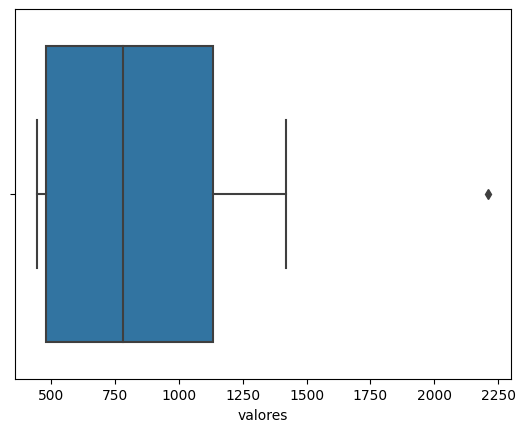

In [ ]:
sns.boxplot(x= a['valores'])

In [ ]:
a = comercio['Country'].value_counts().to_frame()

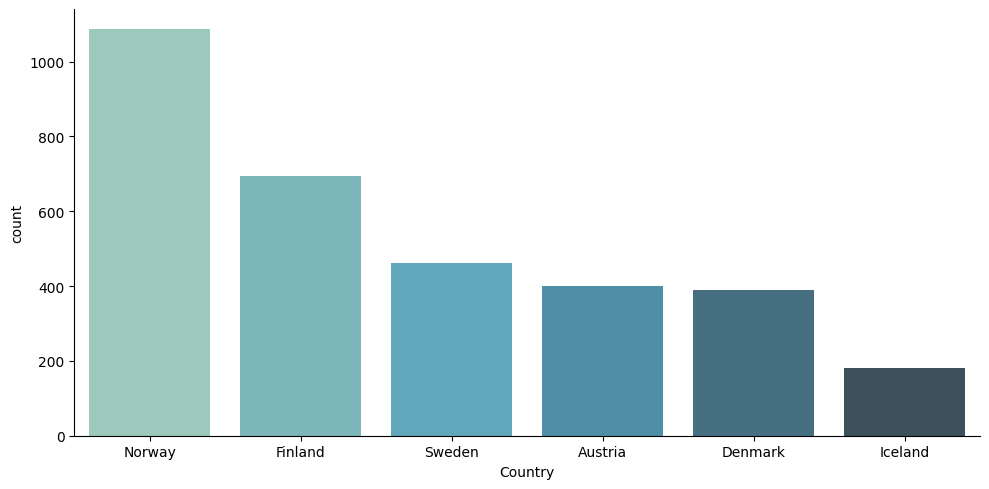

In [ ]:
sns.catplot(x='Country', kind = 'count',
            data = comercio,
            aspect = 2,
            palette = 'GnBu_d',
            order = a.index)

# Exercício 5
  * Um dos produtos possui a seguinte função lucro −𝟐𝒑𝟐+𝟓𝟎𝒑−𝟏𝟎. Encontre a derivada da função lucro. Qual seria o melhor preço?

In [ ]:
#definindo o símbolo
p = sp.Symbol('p')
p

p

In [ ]:
#definindo a função
funcao = -2 * p**2 + 50 * p - 10
funcao

-2*p**2 + 50*p - 10

In [ ]:
#encontrando a derivada
derivada_funcao = sp.diff(funcao, p)
derivada_funcao

50 - 4*p

In [ ]:
#resolvendo a derivada
sp.solve(derivada_funcao)

[25/2]

In [ ]:
#encontrando o melhor preço
25/2

#o melhor preço é 12.5

12.5